In [29]:
import os
import numpy as np
import perceval as pcvl
from perceval.algorithm import Sampler
from time import time
## Use the symbolic skin for display
from perceval.rendering import DisplayConfig, SymbSkin
DisplayConfig.select_skin(SymbSkin)

print('perceval ver:',pcvl.__version__)
token = os.environ.get('MY_QUANDELA_TOKEN')
assert token!=None
pcvl.save_token(token)

perceval ver: 0.12.0


In [37]:
# Set up input state
nq=2
inpStr='10'*nq
print()
inpState='|'+','.join(inpStr) +'>'
print(inpState)


|1,0,1,0>


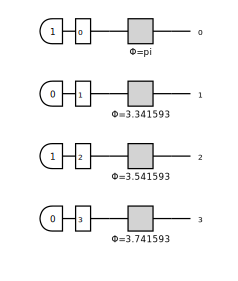

In [27]:
# run on remote simulator 
circuit= pcvl.Circuit(2*nq) 
remProc = pcvl.RemoteProcessor("sim:ascella")
remProc.set_circuit(circuit)

for iq in range(2*nq):
    remProc.add(iq,pcvl.PS(np.pi+iq/5.))

remProc.min_detected_photons_filter(1)  # Output state filering on the basis of detected photons
remProc.with_input(pcvl.BasicState(inpState)) # order matters
pcvl.pdisplay(remProc)

In [31]:
nsamples = 500
sampler = Sampler(remProc, max_shots_per_call=nsamples) 
sampler.default_job_name = "My sampling job3"  
job = sampler.sample_count.execute_async(nsamples)  # Create a job
print(job.id)  # Once created, the job was assigned a unique id
# sim:ancella. cbf04648-8459-41b5-9488-cd189b07ecd6

cbf04648-8459-41b5-9488-cd189b07ecd6


In [33]:
from tqdm.notebook import tqdm
previous_prog = 0
with tqdm(total=1, bar_format='{desc}{percentage:3.0f}%|{bar}|') as tq:
    tq.set_description(f'Get {nsamples} samples from {remProc.name}')
    while not job.is_complete:
        tq.update(job.status.progress/100-previous_prog)
        previous_prog = job.status.progress/100
        time.sleep(1)
    tq.update(1-previous_prog)
    tq.close()

print(f"Job status = {job.status()}")

  0%|          |

Job status = SUCCESS


In [36]:
print(job)
results = job.get_results()
print(results['results'])


RemoteJob with name:My sampling job3, id:cbf04648-8459-41b5-9488-cd189b07ecd6, status:SUCCESS
{
  |0,0,1,0>: 243
  |1,0,0,0>: 240
  |1,0,1,0>: 17
}
